In [1]:
import pandas as pd
import numpy as np

# Loading in Data

In [2]:
# hotel_review = pd.read_csv('Hotel_Reviews.csv')
# hotel_review_sample = hotel_review.sample(frac=0.2, random_state = 42)
# hotel_review_sample.to_csv("hotel_review_sample.csv", index = False)

In [3]:
hotel_review_sample = pd.read_csv("hotel_review_sample.csv")

In [4]:
hotel_prices = pd.read_csv('booking_bcn1.csv', index_col = 0)

Checking to see how many hotel names match

In [5]:
hotel_review_sample['name_processed'] = hotel_review_sample['Hotel_Name'].str.strip().str.lower()

drop_cols = [
    'Hotel_Name'
]

hotel_review_sample = hotel_review_sample.drop(columns=drop_cols)

In [6]:
hotel_prices['name_processed'] = hotel_prices['Hotels'].str.lower().str.split()

drop_cols = [
    'Hotels'
]

hotel_prices = hotel_prices.drop(columns=drop_cols)

In [7]:
hotel_prices['name_processed'] = hotel_prices['name_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
matching_hotels = set(hotel_prices['name_processed']).intersection(set(hotel_review_sample['name_processed']))

# Count the number of matches
num_matches = len(matching_hotels)

print(f"Number of matching hotel names: {num_matches}")


Number of matching hotel names: 96


Getting rid of columns we don't need

In [8]:
hotel_review_sample.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'name_processed'],
      dtype='object')

In [9]:
drop_cols = [
    'Hotel_Address', 
    'Additional_Number_of_Scoring', 
    'Review_Date', 
    'Average_Score', 
    'Reviewer_Nationality', 
    'Total_Number_of_Reviews', 
    'Tags', 
    'days_since_review', 
    'lat', 
    'lng'
]

hotel_review_sample = hotel_review_sample.drop(columns=drop_cols)

In [10]:
merged_df = hotel_review_sample.merge(
    hotel_prices, on="name_processed", how="inner"
)


In [11]:
# merged_df
merged_df.columns

Index(['Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'name_processed', 'Prices', 'Descriptions', 'Full_Descriptions'],
      dtype='object')

In [12]:
print(merged_df.isna().sum())  # See missing values


Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
name_processed                                0
Prices                                        0
Descriptions                                  0
Full_Descriptions                             0
dtype: int64


In [13]:
merged_df = merged_df[['name_processed']+ ['Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
        'Prices', 'Descriptions', 'Full_Descriptions']]

In [14]:
merged_df.columns

Index(['name_processed', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Prices', 'Descriptions', 'Full_Descriptions'],
      dtype='object')

In [15]:
merged_df['Prices'] = merged_df['Prices'].str.replace('€', '', regex=True).str.replace(',', '', regex=True).str.strip().astype(float)

In [16]:
merged_df.columns

Index(['name_processed', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Prices', 'Descriptions', 'Full_Descriptions'],
      dtype='object')

In [17]:
merged_df

,name_processed,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Prices,Descriptions,Full_Descriptions
0,room mate anna,Nothing to dislike,4,Location Culture bars and restaurants Transpo...,13,2,9.6,1418.0,1 double bed,Featuring a seasonal rooftop plunge pool with ...
1,hotel barcelona center,No Negative,0,The hotel was in a great spot near to everyth...,29,7,8.8,1584.0,Multiple bed types,Barcelona Center is 400 metres from Barcelona’...
2,hotel barcelona catedral,Due to the location and it being a very touri...,31,We had such a great experience here The staff...,138,1,10.0,2259.0,1 extra-large double bed,There is a gym and a rooftop chill-out terrace...
3,petit palace boqueria garden,No Negative,0,Free coffee if wanted during breakfast withou...,41,1,7.9,2068.0,Beds: 1 double or 2 singles,The Petit Palace Boqueria Garden is set in a h...
4,hotel ronda lesseps,Semi transparent wall of bathroom It cause un...,14,Easy to reach from and to airport by metro wi...,41,4,7.9,1352.0,1 double bed,The Hotel Ronda Lesseps is a quiet and familia...
...,...,...,...,...,...,...,...,...,...,...
6003,capri by fraser barcelona,There was a faint sewage smell in the bathroo...,24,Lovely studio and apartment hotel with large ...,43,13,9.6,1347.0,Beds: 1 double or 2 singles,This motorcycle-friendly hotel is 3 Metro stop...
6004,petit palace boqueria garden,The streets were very noisy from 3 6am No cof...,18,Great location,4,10,7.9,2068.0,Beds: 1 double or 2 singles,The Petit Palace Boqueria Garden is set in a h...
6005,hotel villa emilia,The room was ready early when we arrived afte...,21,Very nice hotel and extremely helpful and fri...,10,1,10.0,1607.0,Beds: 1 double or 2 singles,This stylish design hotel is located 150 metre...
6006,olivia balmes hotel,No Negative,0,Staff were lovely very useful The shower was ...,29,15,9.2,1904.0,Beds: 1 double or 2 singles,"Offering an outdoor swimming pool, Olivia Balm..."


# P(Hotel Recommendation | Sentiment, Reviewer Score, Price)
Converting observations into probabilities and generating CPTs

In [18]:
# Labeling sentiment based on positive/negative word count
def classify_sentiment(row):
    if row['Review_Total_Positive_Word_Counts'] > row['Review_Total_Negative_Word_Counts']:
        return 'Positive'
    elif row['Review_Total_Positive_Word_Counts'] < row['Review_Total_Negative_Word_Counts']:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['Sentiment'] = merged_df.apply(classify_sentiment, axis=1)


In [19]:
# applying bins for reviewer and price for cpt
reviewer_bins = [0, 7, 10]  
reviewer_labels = ['Low', 'High']

price_bins = [1000, 1800, float('inf')]
price_labels = ['Affordable', 'Expensive']

merged_df['Reviewer_Score_Binned'] = pd.cut(merged_df['Reviewer_Score'], bins=reviewer_bins, labels=reviewer_labels, include_lowest=True)
merged_df['Price_Binned'] = pd.cut(merged_df['Prices'], bins=price_bins, labels=price_labels, include_lowest=True)



merged_df[['Reviewer_Score', 'Reviewer_Score_Binned', 'Prices', 'Price_Binned']].head()

,Reviewer_Score,Reviewer_Score_Binned,Prices,Price_Binned
0,9.6,High,1418.0,Affordable
1,8.8,High,1584.0,Affordable
2,10.0,High,2259.0,Expensive
3,7.9,High,2068.0,Expensive
4,7.9,High,1352.0,Affordable


In [20]:
# creating target variable
def create_recommendation_score(row):
    base_score = row['Reviewer_Score'] / 10 
    

    sentiment_adjustment = {
        'Positive': 0.2,
        'Neutral': 0,
        'Negative': -0.2
    }
    
    adjusted_score = base_score + sentiment_adjustment[row['Sentiment']]
    
    return max(0, min(1, adjusted_score))

In [21]:
merged_df['Hotel_Recommendation_Score'] = merged_df.apply(create_recommendation_score, axis=1)

In [22]:
# Not Recommended (0) and Recommended (1)
merged_df['Hotel_Recommendation'] = pd.qcut(
    merged_df['Hotel_Recommendation_Score'], 
    q=2,  
    
    labels=[0, 1]
)


In [23]:

cpt_recommendation = (
    merged_df.groupby(['Sentiment', 'Reviewer_Score_Binned', 'Price_Binned'])
    ['Hotel_Recommendation']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)


def laplace_smoothing(cpt, alpha=1):
    smoothed_cpt = (cpt * cpt.sum(axis=1).values.reshape(-1, 1) + alpha) / (cpt.sum(axis=1) + alpha * len(cpt.columns)).values.reshape(-1, 1)
    return smoothed_cpt


smoothed_cpt = laplace_smoothing(cpt_recommendation)


smoothed_cpt

C:\Users\YooNi\AppData\Local\Temp\ipykernel_24328\2017079193.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(['Sentiment', 'Reviewer_Score_Binned', 'Price_Binned'])


Hotel_Recommendation                                 0         1
Sentiment Reviewer_Score_Binned Price_Binned                    
Negative  Low                   Affordable    0.666667  0.333333
                                Expensive     0.666667  0.333333
          High                  Affordable    0.666667  0.333333
                                Expensive     0.666667  0.333333
Neutral   Low                   Affordable    0.666667  0.333333
                                Expensive     0.666667  0.333333
          High                  Affordable    0.599251  0.400749
                                Expensive     0.581081  0.418919
Positive  Low                   Affordable    0.666667  0.333333
                                Expensive     0.666667  0.333333
          High                  Affordable    0.381107  0.618893
                                Expensive     0.359656  0.640344

In [24]:
# accuracy of our model
predictions = []
actuals = []

for idx, row in merged_df.iterrows():
    # Get the probabilities from CPT for this combination
    try:
        probs = smoothed_cpt.loc[(row['Sentiment'], 
                                 row['Reviewer_Score_Binned'], 
                                 row['Price_Binned'])]
        # Predict 1 if probability of 1 is higher
        pred = 1 if probs[1] > probs[0] else 0
        predictions.append(pred)
        actuals.append(row['Hotel_Recommendation'])
    except:
        continue


accuracy = sum(p == a for p, a in zip(predictions, actuals)) / len(predictions)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 93.21%


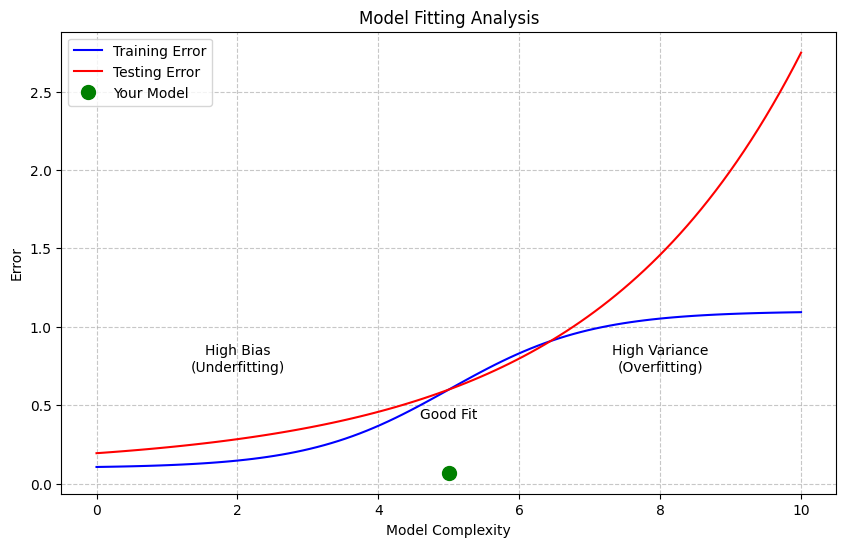

In [25]:
import numpy as np
import matplotlib.pyplot as plt


model_complexity = np.linspace(0, 10, 100)
training_error = 1 / (1 + np.exp(-(model_complexity - 5))) + 0.1  
testing_error = 0.5 * np.exp((model_complexity - 5)/3) + 0.1      


plt.figure(figsize=(10, 6))
plt.plot(model_complexity, training_error, 'b-', label='Training Error')
plt.plot(model_complexity, testing_error, 'r-', label='Testing Error')


optimal_point = np.argmin(np.abs(training_error - testing_error))


your_error = 0.07
model_position = 5  

plt.plot(model_position, your_error, 'go', markersize=10, label='Your Model')

plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Model Fitting Analysis')
plt.legend()

# Add annotations
plt.annotate('High Bias\n(Underfitting)', xy=(2, 0.5), xytext=(2, 0.7),
            ha='center', va='bottom')
plt.annotate('High Variance\n(Overfitting)', xy=(8, 0.5), xytext=(8, 0.7),
            ha='center', va='bottom')
plt.annotate('Good Fit', xy=(5, 0.3), xytext=(5, 0.4),
            ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


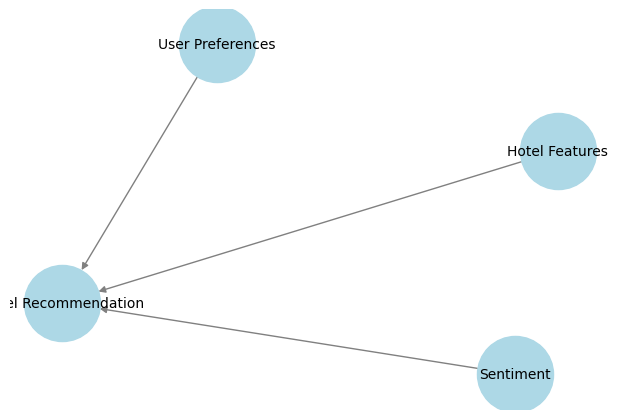

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([("User Preferences", "Hotel Recommendation"), 
                  ("Hotel Features", "Hotel Recommendation"), 
                  ("Sentiment", "Hotel Recommendation")])

plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.savefig("BN_structure.png")
plt.show()


# Making agent

In [27]:
def get_hotel_recommendation(hotel_name, merged_df, smoothed_cpt):

    hotel_data = merged_df[merged_df['name_processed'] == hotel_name.lower()]
    
    if len(hotel_data) == 0:
        return "Hotel not found in database"
    
    # Get the first matching record
    hotel = hotel_data.iloc[0]
    
    # Get probabilities from CPT
    try:
        probs = smoothed_cpt.loc[(hotel['Sentiment'],  hotel['Reviewer_Score_Binned'], hotel['Price_Binned'])]
        
        recommendation = "Recommended" if probs[1] > probs[0] else "Not Recommended"
        confidence = max(probs[0], probs[1])
        
        return {
            'hotel_name': hotel_name,
            'recommendation': recommendation,
            'confidence': f"{confidence:.2%}",
            'price': f"€{hotel['Prices']:.2f}",
            'reviewer_score': f"{hotel['Reviewer_Score']}/10",
            'sentiment': hotel['Sentiment']
        }
    except:
        return "No recommendation found"

In [28]:
# user will be able to input price preference such as affordable or expensive and set a minmum reviewer score (0-10)
def find_best_hotels(merged_df, smoothed_cpt, price_preference=None, min_score=0):
    recommendations = []
    for _, hotel in merged_df.iterrows():
        
        if price_preference and hotel['Price_Binned'] != price_preference:
            continue

        if hotel['Reviewer_Score'] < min_score:
            continue

        cpt_index = (hotel['Sentiment'], hotel['Reviewer_Score_Binned'], hotel['Price_Binned'])
        if cpt_index not in smoothed_cpt.index:
            continue
        
        probs = smoothed_cpt.loc[cpt_index]
        recommendation_prob = probs[1]  # Probability of being recommended
        
        if recommendation_prob > 0.5:  # Only include if more likely to be recommended
            recommendations.append({
                'hotel_name': hotel['name_processed'],
                'probability': recommendation_prob,
                'price': hotel['Prices'],
                'reviewer_score': hotel['Reviewer_Score'],
                'sentiment': hotel['Sentiment']
            })
    
    # Sort by recommendation probability
    recommendations.sort(key=lambda x: x['probability'], reverse=True)
    return recommendations


In [29]:
# Example 
# first get recommendation for specific hotel
hotel_name = "olivia balmes hotel"  # Replace with actual hotel name
recommendation = get_hotel_recommendation(hotel_name, merged_df, smoothed_cpt)
print("\nSingle Hotel Recommendation:")
print(recommendation)

# second find best affordable hotels with minimum score of 7
best_hotels = find_best_hotels(merged_df, smoothed_cpt, 
                             price_preference='Affordable', 
                             min_score=7)
print("\nTop 5 Recommended Hotels:")
for hotel in best_hotels[:5]:
    print(f"\nHotel: {hotel['hotel_name']}")
    print(f"Recommendation Confidence: {hotel['probability']:.2%}")
    print(f"Price: €{hotel['price']:.2f}")
    print(f"Score: {hotel['reviewer_score']}/10")
    print(f"Sentiment: {hotel['sentiment']}")


Single Hotel Recommendation:
{'hotel_name': 'olivia balmes hotel', 'recommendation': 'Recommended', 'confidence': '64.03%', 'price': '€1904.00', 'reviewer_score': '10.0/10', 'sentiment': 'Positive'}

Top 5 Recommended Hotels:

Hotel: room mate anna
Recommendation Confidence: 61.89%
Price: €1418.00
Score: 9.6/10
Sentiment: Positive

Hotel: hotel barcelona center
Recommendation Confidence: 61.89%
Price: €1584.00
Score: 8.8/10
Sentiment: Positive

Hotel: hotel ronda lesseps
Recommendation Confidence: 61.89%
Price: €1352.00
Score: 7.9/10
Sentiment: Positive

Hotel: catalonia atenas
Recommendation Confidence: 61.89%
Price: €1649.00
Score: 8.8/10
Sentiment: Positive

Hotel: catalonia eixample 1864
Recommendation Confidence: 61.89%
Price: €1314.00
Score: 10.0/10
Sentiment: Positive


## New Agent Idea: regular HMM, not Gaussian HMM becuase that's for continuous data

In [ ]:
merged_df

,name_processed,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Prices,Descriptions,Full_Descriptions,Sentiment,Reviewer_Score_Binned,Price_Binned,Hotel_Recommendation_Score,Hotel_Recommendation
0,room mate anna,Nothing to dislike,4,Location Culture bars and restaurants Transpo...,13,2,9.6,1418.0,1 double bed,Featuring a seasonal rooftop plunge pool with ...,Positive,High,Affordable,1.00,1
1,hotel barcelona center,No Negative,0,The hotel was in a great spot near to everyth...,29,7,8.8,1584.0,Multiple bed types,Barcelona Center is 400 metres from Barcelona’...,Positive,High,Affordable,1.00,1
2,hotel barcelona catedral,Due to the location and it being a very touri...,31,We had such a great experience here The staff...,138,1,10.0,2259.0,1 extra-large double bed,There is a gym and a rooftop chill-out terrace...,Positive,High,Expensive,1.00,1
3,petit palace boqueria garden,No Negative,0,Free coffee if wanted during breakfast withou...,41,1,7.9,2068.0,Beds: 1 double or 2 singles,The Petit Palace Boqueria Garden is set in a h...,Positive,High,Expensive,0.99,0
4,hotel ronda lesseps,Semi transparent wall of bathroom It cause un...,14,Easy to reach from and to airport by metro wi...,41,4,7.9,1352.0,1 double bed,The Hotel Ronda Lesseps is a quiet and familia...,Positive,High,Affordable,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,capri by fraser barcelona,There was a faint sewage smell in the bathroo...,24,Lovely studio and apartment hotel with large ...,43,13,9.6,1347.0,Beds: 1 double or 2 singles,This motorcycle-friendly hotel is 3 Metro stop...,Positive,High,Affordable,1.00,1
6004,petit palace boqueria garden,The streets were very noisy from 3 6am No cof...,18,Great location,4,10,7.9,2068.0,Beds: 1 double or 2 singles,The Petit Palace Boqueria Garden is set in a h...,Negative,High,Expensive,0.59,0
6005,hotel villa emilia,The room was ready early when we arrived afte...,21,Very nice hotel and extremely helpful and fri...,10,1,10.0,1607.0,Beds: 1 double or 2 singles,This stylish design hotel is located 150 metre...,Negative,High,Affordable,0.80,0
6006,olivia balmes hotel,No Negative,0,Staff were lovely very useful The shower was ...,29,15,9.2,1904.0,Beds: 1 double or 2 singles,"Offering an outdoor swimming pool, Olivia Balm...",Positive,High,Expensive,1.00,1
